

This is a test of equal means
Ho: The means of all groups are equal
Ha: At least one group mean is different

3.163017112999351e-07
The F test statistic is 11.203 and the p-value is 0.0

Conclusion: Reject Ho: At least one group mean is different

Manufacturer by Price columns
                  Price
Manufacturer           
Ford          29.604428
Hyundai       24.380720
Subaru        34.255780
Toyota        31.389271



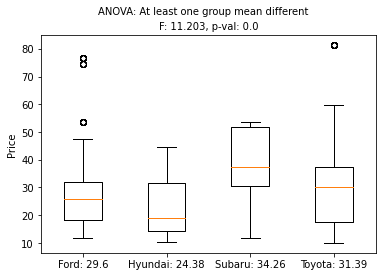

 Multiple Comparison of Means - Tukey HSD, FWER=0.20  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   Ford Hyundai  -5.2237  0.001 -7.9603 -2.4871   True
   Ford  Subaru   4.6514 0.0618  0.9737   8.329   True
   Ford  Toyota   1.7848 0.4538 -0.5979  4.1676  False
Hyundai  Subaru   9.8751  0.001  5.9079 13.8423   True
Hyundai  Toyota   7.0086  0.001  4.1994  9.8177   True
 Subaru  Toyota  -2.8665 0.4312 -6.5984  0.8654  False
------------------------------------------------------


C:\Users\ruchi\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


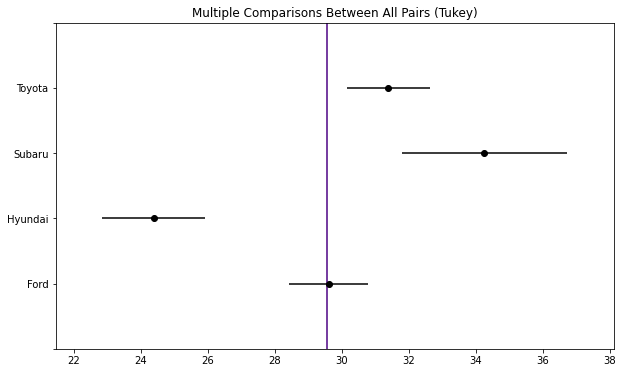

<Figure size 432x288 with 0 Axes>

In [1]:
# QUESTION 6
# Use a data set and perform an ANOVA. 
# The data must be broken into at least 4 groups, with each containing at least 25 observations.
# Build a box plot and a vlines graph.

import pandas as pd
from pandas import Series, DataFrame
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

CarsDF = pd.read_excel('DataSets.xlsx', sheet_name='CarsData',
                      skiprows=(0,1,2), header=None,
                      names=['Manufacturer','Model','Price','Transmission',
                      'Power','EngineCC', 'Fuel', 'MaleOwners', 'FemaleOwners', 'UnknownOwners', 'TotalOwners'], usecols='C:M')
print()
print()


# PART 1
Ford = CarsDF[CarsDF['Manufacturer']=='Ford']
Hyundai = CarsDF[CarsDF['Manufacturer']=='Hyundai']
Subaru = CarsDF[CarsDF['Manufacturer']=='Subaru']
Toyota = CarsDF[CarsDF['Manufacturer']=='Toyota']

alpha = .2
f, p_val = stats.f_oneway(Ford['Price'],Hyundai['Price'],Subaru['Price'],Toyota['Price'])

print("This is a test of equal means")
print("Ho: The means of all groups are equal")
print("Ha: At least one group mean is different")
print()
print(p_val)
print(f"The F test statistic is {round(f,3)} and the p-value is {round(p_val,6)}")
print()
if p_val < alpha:
    print("Conclusion: Reject Ho: At least one group mean is different")
    ANOVAtype = "ANOVA: At least one group mean different"
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    ANOVAtype = "ANOVA: Group Means are the same"

print()
print("Manufacturer by Price columns")
AnovaPivot = CarsDF.pivot_table(['Price'], index=['Manufacturer'])
print(AnovaPivot)
print()

y=[Ford['Price'],Hyundai['Price'],Subaru['Price'],Toyota['Price']]
with PdfPages(r'C:\Users\ruchi\Python INFO 3100\AnovaBoxplot.pdf') as export_pdf:
    plt.boxplot(y)
    plt.title(f'F: {round(f,3)}, p-val: {round(p_val,4)}',size=10)
    plt.suptitle(ANOVAtype,size=10)
    plt.xticks(range(1,5), [f"Ford: {round(Ford['Price'].mean(),2)}",
                            f"Hyundai: {round(Hyundai['Price'].mean(),2)}", 
                            f"Subaru: {round(Subaru['Price'].mean(),2)}",
                            f"Toyota: {round(Toyota['Price'].mean(),2)}"])
    plt.ylabel('Price')
    export_pdf.savefig()
    plt.show()

# PART 2
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Data (endogenous/response variable)
tukey = pairwise_tukeyhsd(endog=CarsDF['Price'],
                          groups=CarsDF['Manufacturer'], alpha=0.2)

print(tukey.summary())
tukey.plot_simultaneous() 
plt.vlines(x=CarsDF['Price'].mean(),ymin=-1,ymax=7, color="indigo")
plt.show()
plt.savefig('AnovaTukeyPlot.jpg', bbox_inches='tight')